<a href="https://colab.research.google.com/github/FaridaElsheikh/GraduationProject/blob/main/MultipleHeartDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
import matplotlib.pyplot as plt

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#LOAD DATA
df = pd.read_csv("cleveland.csv", header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope   ca  thal  target
0   63    1   1       145   233    1  ...      0      2.3      3  0.0   6.0       0
1   67    1   4       160   286    0  ...      1      1.5      2  3.0   3.0       2
2   67    1   4       120   229    0  ...      1      2.6      2  2.0   7.0       1
3   37    1   3       130   250    0  ...      0      3.5      3  0.0   3.0       0
4   41    0   2       130   204    0  ...      0      1.4      1  0.0   3.0       0

[5 rows x 14 columns]


In [ ]:
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

In [ ]:
len(df)

303

In [ ]:
# get statistics values
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,1.228536
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


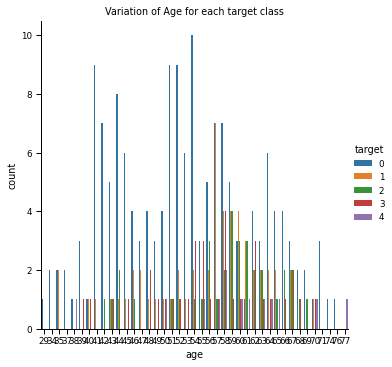

In [ ]:
# distribution of target vs age 
sns.set_context('paper') 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

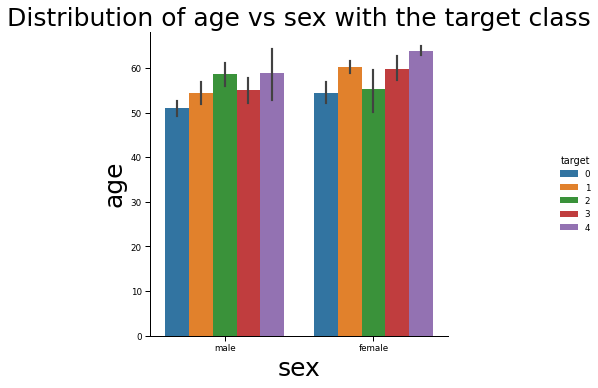

In [ ]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [ ]:
# get number of people with symptom X_k
names_descr = dict()

categorical_columns = [ 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
for c in categorical_columns:
    print  (df.groupby([c])["age"].count())

sex
female     97
male      206
Name: age, dtype: int64
cp
1     23
2     50
3     86
4    144
Name: age, dtype: int64
trestbps
94      2
100     4
101     1
102     2
104     1
105     3
106     1
108     6
110    19
112     9
114     1
115     3
117     1
118     7
120    37
122     4
123     1
124     6
125    11
126     3
128    12
129     1
130    36
132     8
134     5
135     6
136     3
138    12
140    32
142     3
144     2
145     5
146     2
148     2
150    17
152     5
154     1
155     1
156     1
158     1
160    11
164     1
165     1
170     4
172     1
174     1
178     2
180     3
192     1
200     1
Name: age, dtype: int64
chol
126    1
131    1
141    1
149    2
157    1
      ..
394    1
407    1
409    1
417    1
564    1
Name: age, Length: 152, dtype: int64
fbs
0    258
1     45
Name: age, dtype: int64
restecg
0    151
1      4
2    148
Name: age, dtype: int64
thalach
71     1
88     1
90     1
95     1
96     2
      ..
190    1
192    1
194    1
195    1
202 

In [ ]:
df['sex'] = df.sex.map({'female': 0, 'male': 1})

In [ ]:
#split attributes
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

#feature scaling
sc = ss()
X_train = sc.fit_transform(X_train)  #fit and transform
X_test = sc.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train)
print(X_test)

# trying smth 
model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Accuracy: %.3f" %acc)   # accuracy = 0.590

